# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [1]:
# Import libraries and modules.

### YOUR CODE HERE ### 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

We would be able to obtain a general idea about all the variables in the data set, how they are related to one anothes and how they affect the overal goal of our work

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

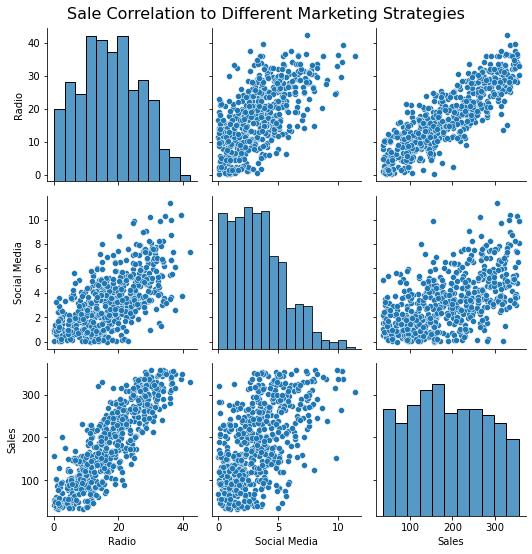

In [3]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
g = sns.pairplot(data)

g.fig.suptitle("Sale Correlation to Different Marketing Strategies", y=1.02,fontsize=16)
plt.tight_layout()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



Radio is the only variable with a clear linear relationship with Sales, as opposed by the social media variable where we observe a cloud-like behaviour with some slope.

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [10]:
# Calculate the mean sales for each TV category. 

### YOUR CODE HERE ### 
TV_sales = data.groupby(['TV'])['Sales'].mean()
print("Mean TV sales:")
print(TV_sales,'\n')

# Calculate the mean sales for each Influencer category. 

### YOUR CODE HERE ### 
Influencer_sales = data.groupby(['Influencer'])['Sales'].mean()
print('Mean Influencer Sales:')
print(Influencer_sales)


Mean TV sales:
TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64 

Mean Influencer Sales:
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



We see that witihin the TV catgories the range of sales is rather large in comparison to the range of sales for the influencer categories. We also notice that the TV high category has the highest mean sale in comparison to all the sales done by influencers.

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [11]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data = data.dropna()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [16]:
# Rename all columns in data that contain a space. 

### YOUR CODE HERE ### 
data = data.rename(columns={'Social Media':"Social_Media"})
data.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [20]:
# Define the OLS formula.

### YOUR CODE HERE ### 
formula = "Sales ~ Radio + C(TV)"

# Create an OLS model.

### YOUR CODE HERE ### 
OLS = ols(formula=formula, data=data[['Sales','Radio','TV']])

# Fit the model.

### YOUR CODE HERE ### 
OLS_model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 
summary = OLS_model.summary()

# Display the model results.

### YOUR CODE HERE ### 
print("Radio and Social Media Results:",summary)


Radio and Social Media Results:                             OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        14:52:58   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept 

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



I chose two variables because I wanted to limit my number of variables to avoid over-fitting. In regards to the varibles chosen I picked the two variable which showed stonger correleation with Sales. In the pairplor we see Radio has clear linearity with the sales variable, and in the mean sales salary we see that TV has a stronger correlation with sales than Influencers.

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

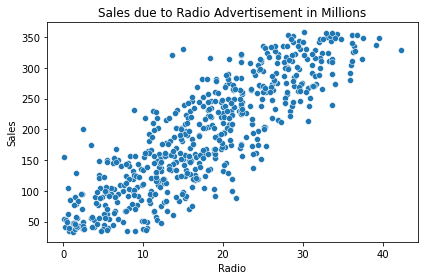

In [23]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ### 
sns.scatterplot(data=data,x='Radio',y='Sales')
plt.title("Sales due to Radio Advertisement in Millions")
plt.tight_layout()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


The linearity assumption is met, because, we can see a clear linear trend with the relationship of Radio add and their corresponding sales.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

(572,)


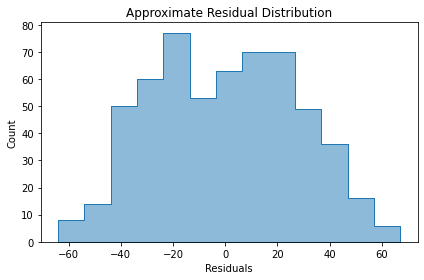

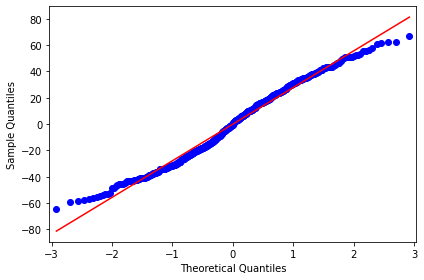

In [41]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residual = OLS_model.resid

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
sns.histplot(residual,element='step',alpha=0.5)
plt.xlabel("Residuals")
plt.title("Approximate Residual Distribution")
plt.tight_layout()
plt.show()


# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 
sm.qqplot(residual,line='s')
plt.tight_layout()
plt.show()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



The normality condition is not fully met, as we see some clear deviations in between the theoretical and sample quantiles for any values past the 2nd quantile.

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

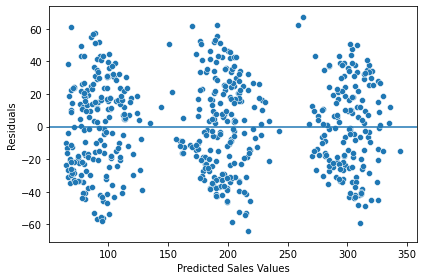

In [47]:
# Create a scatterplot with the fitted values from the model and the residuals.
predicts = OLS_model.predict(data[['TV','Radio']])

### YOUR CODE HERE ### 
fig, ax = plt.subplots(1,1,figsize=(6,4))
sns.scatterplot(x=predicts,y=residual,ax=ax)
ax.set_xlabel("Predicted Sales Values")
ax.set_ylabel("Residuals")


# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 
ax.axhline(y=0)
plt.tight_layout()
plt.show()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




The scatter plot shows three random clouds of residuals centered about the y=0 line, which implies that the condition for constant variance is met. 

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

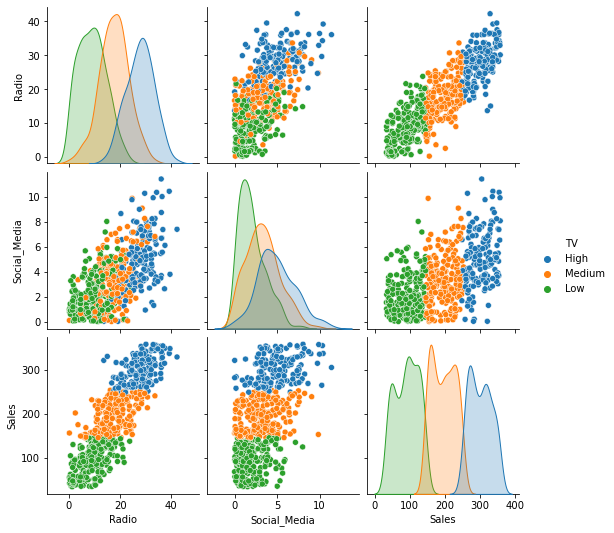

In [52]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
g = sns.pairplot(data,hue='TV',hue_order=['High','Medium','Low'])
plt.show()


In [64]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# NOTE: Cannot do variance inflation factor with a continous variable and a categorical variable so for 
# practice I will calculate IVF with Radio and Social_Media variables

# Create data frame with independent variables used
sample = data[['Social_Media','Radio']]

# Calculate VIF
VIF = [variance_inflation_factor(sample.values,i) for i in range(sample.shape[1])]

# Convert it into a df
df_VIF = pd.DataFrame(VIF, index=sample.columns, columns = ['VIF'])

# Display df
df_VIF

,VIF
Social_Media,5.170922
Radio,5.170922


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?

**Answer:** We see that the VIF is a barely greater than 5 which leads us to conclude that the variables are correlated, we are using the standar rule that VIF > 5 implies correlation in between variables.



## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [66]:
# Display the model results summary.

### YOUR CODE HERE ### 
print("TV and Radio Influence on Sales")
print(summary)


TV and Radio Influence on Sales
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        14:52:58   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept 

**Question:** What is your interpretation of the model's R-squared?


The R-squared is very close to 1 with a value of 0.904 which implies that TV and Radio do a very good job at explaining the behaviour of sales.

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [67]:
# Display the model results summary.

### YOUR CODE HERE ### 
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Mon, 21 Aug 2023   Prob (F-statistic):          1.63e-288
Time:                        14:52:58   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     

**Question:** What are the model coefficients?



There are 3 model coefficients, two for the TV categories and 1 for the Radio variable. These coefficients can be written in a formula as follows. We note that given the summary the High category in TV was encoded with a 0. This means that the High category as used as a reference point.

$$
\text{Sales} = 218.52 + 2.96 X_{\text{Radio}} - 154.29 X_{\text{TV, Low}} - 75.31 X_{\text{TV, Med}}
$$

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



See above

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



**TV-Interpretation:**  As discussed earlier the High category was used as a reference point. That is if all variables are held constant then we would expect the Medium category to have -75.32 millions less in sales compared to the sales in the High category. Likewise we can also interpret that the Low category will have -154.29 millions less in sales compared to the High category.

**Radio-Interpreation** Because the radio variable is continuous we can interpret this coefficient as a rate of return of the initial investment. That is of very unit increase in Radio ads the expected sales are 2.96x the initial investment.

**Question:** Why is it important to interpret the beta coefficients?



Interpreting the beta coefficients are important because they describe how the independent variables affect the dependent variable.

**Question:** What are you interested in exploring based on your model?



It would be interested in exploring possible correlations between TV ads and radio ads. As we saw in the pairplot diagaram with the different hues, there is a visible correlation between the TV categories and the radio investments.

**Question:** Do you think your model could be improved? Why or why not? How?

Model could be improved if we find a way to remove the multicolinearity between TV and radio by creating a new variable that represents both of these features.

## Conclusion

**What are the key takeaways from this lab?**

It is important to understand what each coefficient means in a multiple regression model as this can help up create a narrative about the nature of the data

**What results can be presented from this lab?**

That TV and Radio adds are the variables that affect the sales the most.

**How would you frame your findings to external stakeholders?**

I would show them how each variables is related to sales and then segway into these two variables as the show several features that indicate they are better at explaining the sales.


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.